# HAND-WRITTEN DIGIT RECOGNITION

# LOAD DATA

In [4]:
import numpy as np
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('C:/Users/Aravind/Documents/Digit_Recognizer/train.csv')
# Dimensions of MNIST data
dataset.shape

(42000, 785)

In [5]:
# Head
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
# X & y
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [10]:
# y is of int type. Change it to categorical
y = y.astype('object')

# Visualization

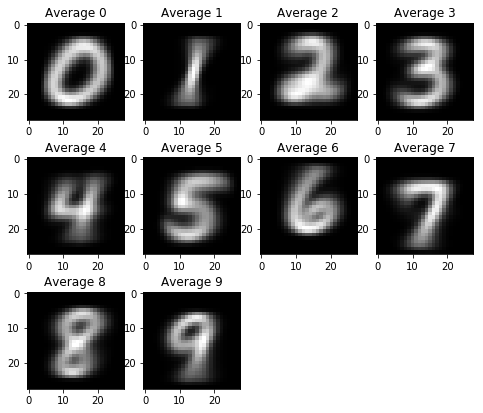

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
m = X.shape[0]
n = X.shape[1]
labels = np.unique(y)
labels_count = labels.shape[0]

# Creating and plotting average digits
average_digits = np.empty((0, n+1))

plt.figure(figsize=(8,7))
plt.gray()

for label in labels:
    digits = X[y.flatten() == label]
    average_digit = digits.mean(0)   
    average_digits = np.vstack((average_digits, np.append(average_digit, label)))
    image = average_digit.reshape(28, 28)
    plt.subplot(3,4,label+1)
    plt.imshow(image)
    plt.title('Average '+str(label))
plt.show()

average_digits_x = average_digits[:,:-1]
average_digits_y = average_digits[:,-1]


# Encoding categorical data

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

# One hot encoding

In [14]:
from keras.utils import np_utils
y = np_utils.to_categorical(y)

C:\Users\Aravind\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Splitting the dataset

In [18]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((33600, 784), (8400, 784), (33600, 10), (8400, 10))

# Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Aravind\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Artificial Neural Networks

In [20]:
# Import Keras libraries 
import keras
from keras.models import Sequential
from keras.layers import Dense

# ANN
classifier = Sequential()

classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu', input_dim = 784))

classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))

classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 50, epochs = 10) # Lesser no of epochs - Basic Model

Epoch 1/10
33600/33600 [==============================] - 4s 131us/step - loss: 0.0478 - acc: 0.9834
Epoch 2/10
33600/33600 [==============================] - 4s 123us/step - loss: 0.0201 - acc: 0.9934
Epoch 3/10
33600/33600 [==============================] - 4s 123us/step - loss: 0.0140 - acc: 0.9954
Epoch 4/10
33600/33600 [==============================] - 4s 117us/step - loss: 0.0109 - acc: 0.9965
Epoch 5/10
33600/33600 [==============================] - 4s 119us/step - loss: 0.0081 - acc: 0.9973
Epoch 6/10
33600/33600 [==============================] - 4s 124us/step - loss: 0.0072 - acc: 0.9978
Epoch 7/10
33600/33600 [==============================] - 4s 119us/step - loss: 0.0056 - acc: 0.9982
Epoch 8/10
33600/33600 [==============================] - 4s 119us/step - loss: 0.0055 - acc: 0.9983
Epoch 9/10
33600/33600 [==============================] - 4s 121us/step - loss: 0.0054 - acc: 0.9984
Epoch 10/10
33600/33600 [==============================] - 4s 121us/step - loss: 0.0046 - a

# Prediction

In [21]:
y_pred = classifier.predict(X_test)

# Accuracy

In [22]:
maxi = y_pred.max(axis=1)
for i in range(len(y_pred)):
    for j in range(10):
        if y_pred[i,j] == maxi[i]:
           y_pred[i,j] = 1
        else:
               y_pred[i,j] = 0
     
# Accuracy    
crt_values = (y_pred == y_test).sum()
wrong_values = (y_pred != y_test).sum()
total = crt_values+wrong_values
result = crt_values/total
print(result)

0.9939285714285714


Neural Networks gives an accuracy of 99.39% 

# Submission

In [ ]:
# submission
test = pd.read_csv("test.csv")

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
test = sc.transform(test)

# fit ann
classifier.fit(X, y, batch_size = 50, epochs = 25)

# Prediction
y_pred_test = classifier.predict(test)

test_labels = np.argmax(y_pred_test, axis=1)

test_labels = pd.Series(test_labels, name="Label")

final_submission = pd.concat([pd.Series(range(1,28001), name = "ImageId"), test_labels], axis = 1)

In [ ]:
# Submission file

final_submission.to_csv("Digit_Recognition_ANN_3.csv", index=False)

# Kaggle Score - 0.97142